In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

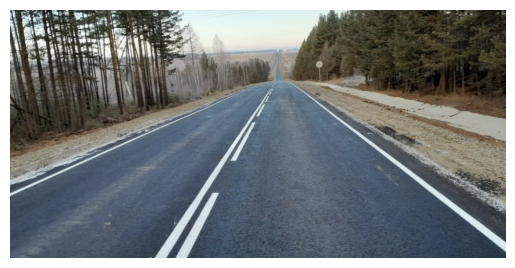

In [4]:
img = cv2.imread('road1.png')
img_view = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
_ = plt.imshow(img_view)

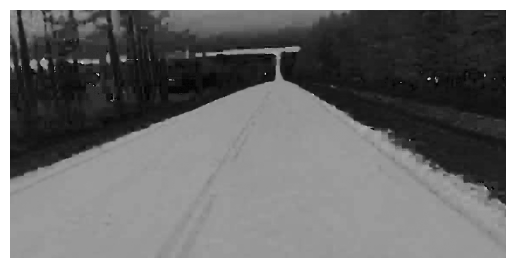

In [5]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
colors = img_hsv[:, :, 0]
plt.axis("off")
_ = plt.imshow(colors, cmap='gray')

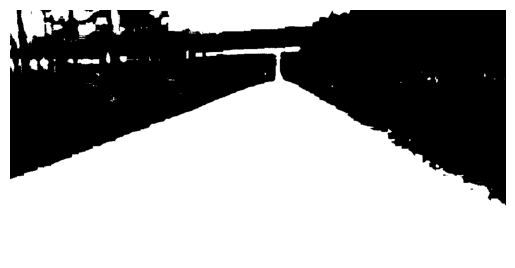

In [6]:
thresh = cv2.threshold(colors, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
plt.axis("off")
_ = plt.imshow(thresh, cmap='gray')

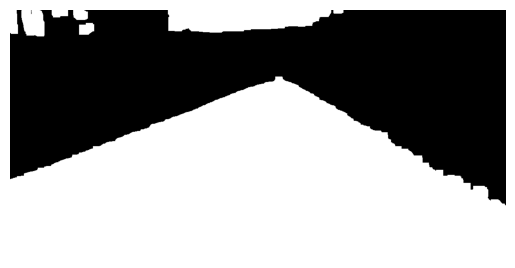

In [7]:
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(thresh, kernel, iterations=4)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=4)
plt.axis("off")
_ = plt.imshow(img_dilation, cmap='gray')

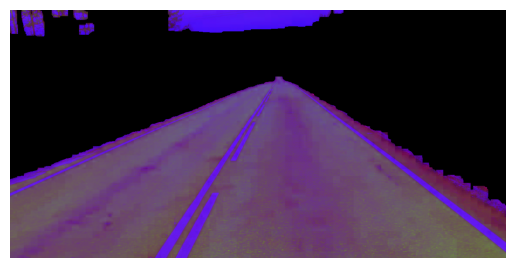

In [8]:
fg = cv2.bitwise_or(img_hsv, img_hsv, mask=img_dilation)
plt.axis("off")
_ = plt.imshow(fg)


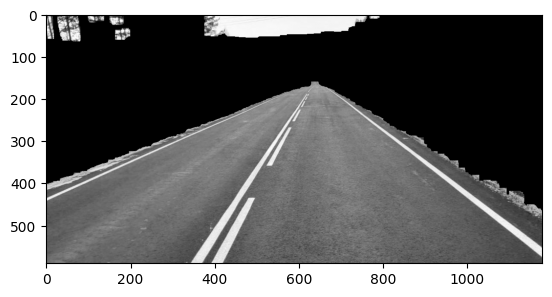

In [9]:
sat = fg[:, :, 2]
_ = plt.imshow(sat, cmap='gray')

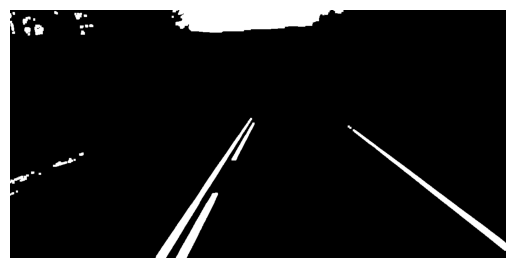

In [10]:
thresh_sat = cv2.threshold(sat, 180, 255, cv2.THRESH_BINARY)[1]
img_erosion = cv2.erode(thresh_sat, kernel)
thresh_sat = cv2.dilate(img_erosion, kernel)
plt.axis("off")
_ = plt.imshow(thresh_sat, cmap='gray')

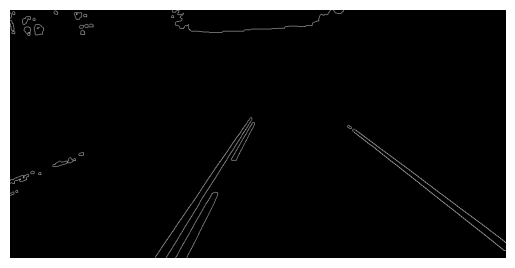

In [11]:
edges = cv2.Canny(thresh_sat,200,350)
plt.axis("off")
_ = plt.imshow(edges, cmap='gray')

In [12]:
MinLineLength = 100
MaxLineGap = 20
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,MinLineLength,MaxLineGap)

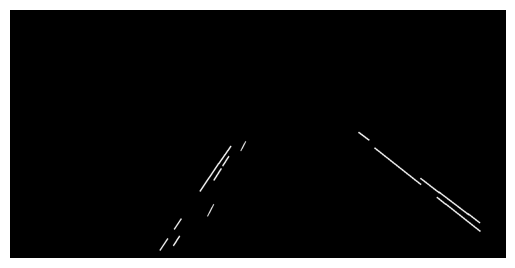

In [13]:
eg2 = np.zeros(edges.shape)
for i in range(len(lines[:,0,0])):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(eg2,(x1,y1),(x2,y2),(255,0,0),2)
plt.axis("off")
_ = plt.imshow(eg2, cmap='gray')

In [14]:
def find_intersection(p1, p2, p3, p4):
    xdiff = (p1[0] - p2[0], p3[0] - p4[0])
    ydiff = (p1[1] - p2[1], p3[1] - p4[1])
    div = xdiff[0] * ydiff[1] - xdiff[1] * ydiff[0]
    if div == 0:
        return None, None  # Линии параллельны

    d = (p1[0]*p2[1] - p1[1]*p2[0], p3[0]*p4[1] - p3[1]*p4[0])
    intersection_x = (d[0] * xdiff[1] - d[1] * xdiff[0]) / div
    intersection_y = (d[0] * ydiff[1] - d[1] * ydiff[0]) / div

    return intersection_x, intersection_y

def get_center(lines):
    arr = []
    for i in range(len(lines[:,0,0])):
        for j in range(len(lines[:,0,0])):
            x1,y1,x2,y2 = lines[i][0]
            _x1,_y1,_x2,_y2 = lines[j][0]
            xr, yr = find_intersection((x1, y1), (x2, y2), (_x1, _y1), (_x2, _y2))
            if xr is not None:
                arr.append([xr, yr])
    arr = np.array(arr)
    return arr
centers = get_center(lines)
print(centers.shape)
cx, cy = np.rint(np.mean(centers, axis=0))

(236, 2)


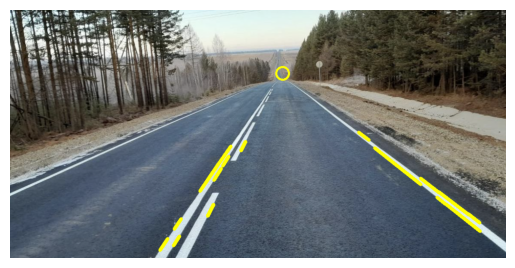

In [21]:
crclimg = np.copy(img_view)
cv2.circle(crclimg,(int(cx),int(cy)),15,(255,255,0), 4)
for i in range(len(lines[:,0,0])):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(crclimg,(x1,y1),(x2,y2),(255,255,0),8)

plt.axis("off")
_ = plt.imshow(crclimg)